# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [2]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
    filter(sports == 'Basketball') |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    select(year, institution_name, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** you can use `geom_col` with `x` and `y` encodings so the bar height reflects spending.)

Warning message:
“Removed 609 rows containing missing values or values outside the scale range
(`geom_col()`).”


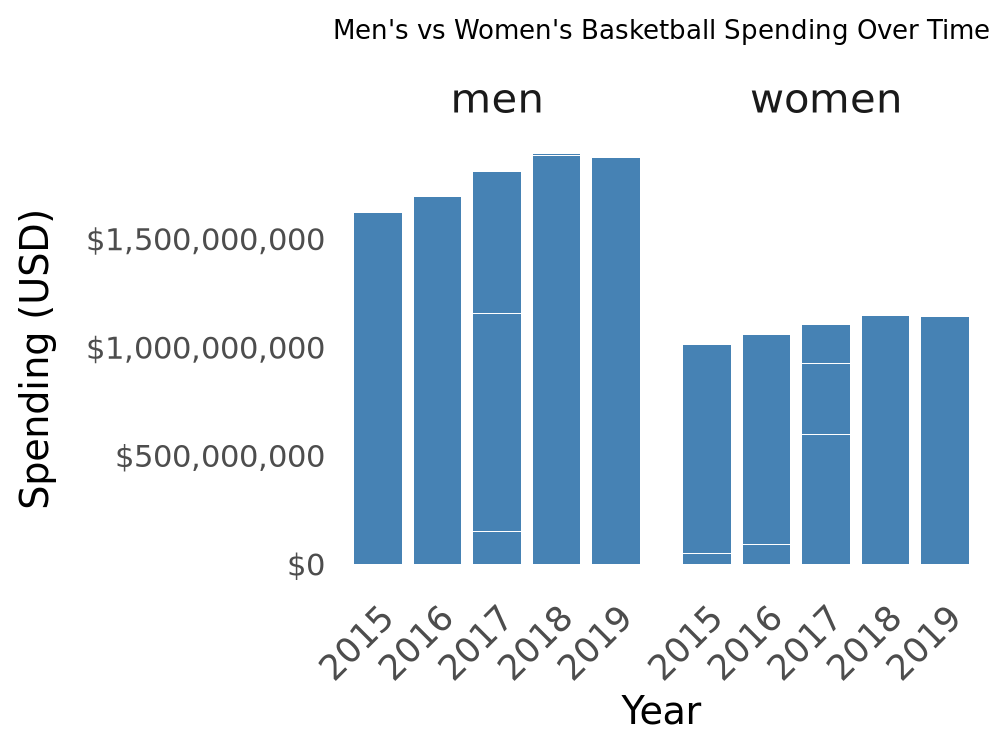

In [25]:
ggplot(ncaa_sports_spending, aes(x = factor(year), y = expenditure_usd)) +
    geom_col(fill = "steelblue", width = .8) +  
    facet_wrap(~ men_or_women) +  
    labs(title = "Men's vs Women's Basketball Spending Over Time",
         x = "Year", 
         y = "Spending (USD)") +  
    scale_y_continuous(labels = scales::dollar_format()) +  
    theme_minimal() +
    theme(
        strip.text = element_text(size = 12), 
        axis.text.x = element_text(angle = 45, hjust = 1, size = 10),  
        plot.title = element_text(size = 7.5, hjust = 0.5),  
        panel.grid.major = element_blank(),  
        panel.grid.minor = element_blank() 
    )

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

**Visualize the same data but this time with a line chart. Make sure your lines are "grouped" according to the `men_or_women` column.**

*Note: use the `ncaa_sports_spending2` table for the line chart! 📈*

In [17]:
# uncomment and run to produce the line chart table

ncaa_sports_spending2 = ncaa_sports_spending |>
 group_by(year, men_or_women) |>
summarize(expenditure_usd = sum(expenditure_usd, na.rm = TRUE))

 ncaa_sports_spending2 |> head()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,men_or_women,expenditure_usd
<dbl>,<chr>,<dbl>
2015,men,1622132863
2015,women,1013740678
2016,men,1695782608
2016,women,1057390299
2017,men,1809020416
2017,women,1105637602


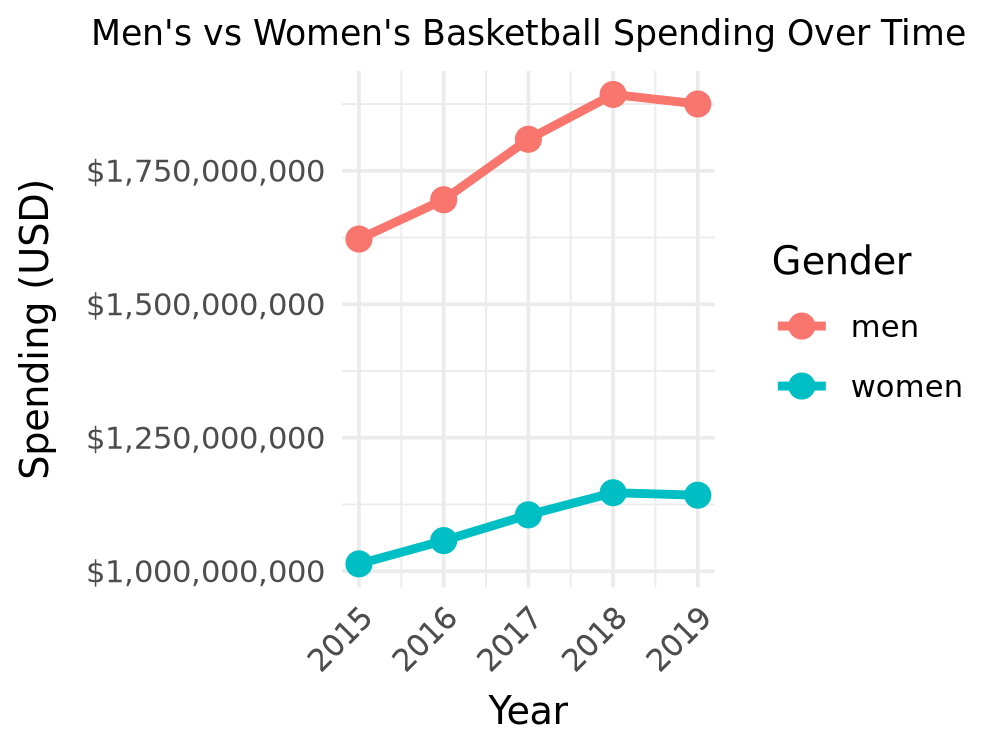

In [19]:
ggplot(ncaa_sports_spending2, aes(x = year, y = expenditure_usd, color = men_or_women, group = men_or_women)) +
    geom_line(size = 1.2) +  # Line plot with thicker lines
    geom_point(size = 3) +  # Add points for emphasis at each year
    labs(title = "Men's vs Women's Basketball Spending Over Time",
         x = "Year", 
         y = "Spending (USD)",
         color = "Gender") +  # Add color legend for men and women
    scale_y_continuous(labels = scales::dollar_format()) +  # Format y-axis labels with dollar signs
    theme_minimal() +
    theme(
        plot.title = element_text(size = 10, hjust = 0.5),  # Center and adjust title size
        axis.text.x = element_text(angle = 45, hjust = 1)  # Rotate x-axis labels for better readability
    )


Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [27]:
 unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
     filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
     pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
     arrange(rev(men_or_women), expenditure_usd) |>
     mutate(sports = fct_inorder(sports)) |>
     select(year, institution_name, sports, men_or_women, expenditure_usd) |>
     mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
     filter(!is.na(expenditure_usd))

Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

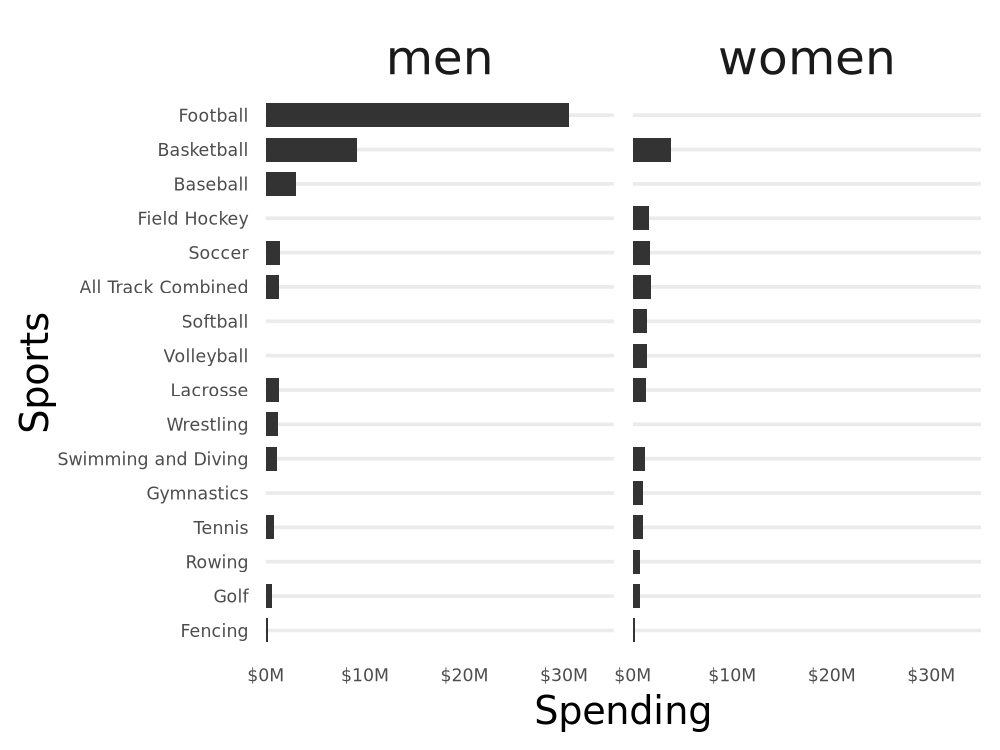

In [44]:
ggplot(unc_sports_spending_2019, aes(x = expenditure_usd, y = fct_reorder(sports, expenditure_usd))) +
    geom_col(fill = "gray20", width = 0.7) +  # Use grayscale for bars and adjust bar width
    facet_wrap(~ men_or_women, ncol = 2) +  # Facet by gender (2 columns)
    labs(x = "Spending", y = "Sports") +  # Simplified labels without title
    scale_x_continuous(
        labels = scales::dollar_format(scale = 1e-6, suffix = "M"),  # Display labels as millions (M)
        breaks = seq(0, 35000000, by = 10000000),  # Adjust breaks to accommodate football spending
        expand = c(0, 0),
        limits = c(0, 35000000)  # Increase x-axis limit to fit football spending
    ) +
    theme_minimal() +
    theme(
        strip.text = element_text(size = 14),  # Adjust facet label text size
        axis.text.x = element_text(size = 5),  # X-axis text size
        axis.text.y = element_text(size = 5),  # Y-axis text size
        panel.grid.major.x = element_blank(),  # Remove major gridlines on x-axis
        panel.grid.minor.x = element_blank(),  # Remove minor gridlines on x-axis
        legend.position = "none"  # Remove the legend for the facets
    )

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/unc_sports_spending.png). **Your chart does not need to look exactly like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?

- The code above is designed to improve the readability of large numbers by converting them into millions and formatting them with dollar symbols.
- Specifically, the `expenditure_usd` values are divided by `1e6` to scale them down to millions.
- Then, the `scale_x_continuous(labels = scales::dollar_format(suffix = 'M'))` function is used to display the x-axis labels in dollar format, appending an “M” to indicate millions (e.g., $10M instead of $10,000,000).
- The `labs()` function is responsible for customizing labels within the plot—such as the x-axis, y-axis, title, and legend.
- In this case, `labs(x = "Spending")` changes the x-axis label to “Spending,” ensuring the chart is clearly labeled and easy to understand.